# Simple Cat Dog Categorising CNN Model
Here we will use a subset of a kaggle dataset to create a cat dog categorising CNN Computer VIsion Deep Learning Model.

Data is locally stored on google drive for this project. This is done on google colab.

## Import Required libraries
We will need:
<ol>
<li>Tensorflow and Keras to create and operate on our deep learning model.</li>
<li>Os module to fetch and interact with data as our dataset consists of images stored in distinct directories.</li>
<li>Pandas to plot the history (may be switched with matplotlib, seaborn, plotly etc. as per requirements; here  used pandas).</li>
<li>Matplotlib for graph manipulation (can also be switched with any of the above mentioned)</li>
</ol>

In [40]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import tensorflow as tfl
  from tensorflow import keras
  import os

## Store Paths of File Storage in Variables
This was done so changes in storage location of dataset would be easy to implement as there is a central location to make all desired changes to.

In [20]:
path_valid = '/content/drive/MyDrive/cats_and_dogs_small/validation'
path_test = '/content/drive/MyDrive/cats_and_dogs_small/test'
path_train = '/content/drive/MyDrive/cats_and_dogs_small/train'

## Preprocessing Data
As we have to work with image data that needs to be converted into RGB format and shape is to be standardised the keras ImageDataGenerator is required.

The import here was just for convienience as the path was too long to write repeatedly, there is no need to do it.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<p>The images were standardised to be (150, 150) in shape and batch size i.e. number of images fed at once and returned from generator will be set to 20 and class mode is binary as the output can be one of two classes.</p>

<p>The testing generator was used for creating validation data instead of the training generator as validation may be seen more as an internal testing and thus the testing generator seemed to be a better fit than the training generator.</p>

In [22]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    path_valid,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Create the Deep Learning Model

In [23]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

## Visualise the Model

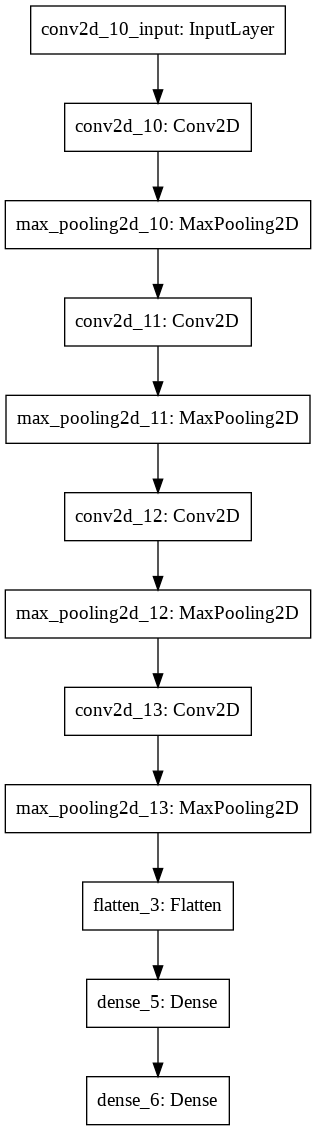

In [24]:
import pydot
import graphviz
keras.utils.plot_model(model)

Note here that while pydot and graphviz are not directly used in the plotting function, they are called internally to implement the plotting hence why it is necessary to import them.

## Compile the Model

<p>Here "binary crossentropy" is used rather than "sparse categorical crossentropy" as the output may only be one of two categories and hence binary crossentropy works better.</p>

<p>The optimizer selected here is the RMSprop optimizer as it works better for image classification than sgd.</p>

<p>Metrics for optimisation is accuracy as we need a model with high accuracy.</p>

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 1e-4), metrics = ['accuracy'])

## Train the Model

Callbacks and Early Stopping is used to get the best possible version of this model.

<em>
<dl>
  <dt>Callbacks</dt>
  <dd>
    Model is saved after each epoch; in this case instead of multiple versions of the model being saved, only the best model i.e. model with highest accuracy is saved.
  </dd>

  <dt>Early Stopping</dt>
  <dd>
    Stopping when no improvement is seen for a number of epochs called patience, here patience is taken to be 10. By default, improvement is noted in val_loss.
  </dd>
</dl>
</em>

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Cat_Dog_Classifier.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

Here number of steps required per epoch is chosen as:<br>
<code>
steps_per_epoch = data_in_training_set/batch_size_of_training_generator
</code>

And number of validation steps as:<br>
<code>
validation_steps = data_in_validation_steps/batch_size_of_validation_generator
</code>

In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 200000000,    # an impossibly large epoch value is passed such as to facilitate early stopping
    validation_data = valid_generator,
    validation_steps = 50,
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/200000000
100/100 [==============================] - 132s 1s/step - loss: 0.6476 - accuracy: 0.6165 - val_loss: 0.6399 - val_accuracy: 0.6400
Epoch 2/200000000
100/100 [==============================] - 106s 1s/step - loss: 0.5967 - accuracy: 0.6770 - val_loss: 0.6067 - val_accuracy: 0.6650
Epoch 3/200000000
100/100 [==============================] - 106s 1s/step - loss: 0.5636 - accuracy: 0.6955 - val_loss: 0.5905 - val_accuracy: 0.6700
Epoch 4/200000000
100/100 [==============================] - 106s 1s/step - loss: 0.5364 - accuracy: 0.7225 - val_loss: 0.5956 - val_accuracy: 0.6640
Epoch 5/200000000
100/100 [==============================] - 105s 1s/step - loss: 0.5082 - accuracy: 0.7460 - val_loss: 0.5612 - val_accuracy: 0.7010
Epoch 6/200000000
100/100 [==============================] - 106s 1s/step - loss: 0.4861 - accuracy: 0.7640 - val_loss: 0.5719 - val_accuracy: 0.6850
Epoch 7/200000000
100/100 [==============================] - 106s 1s/step - loss: 0.4580 - accuracy:

## Visualise Training History

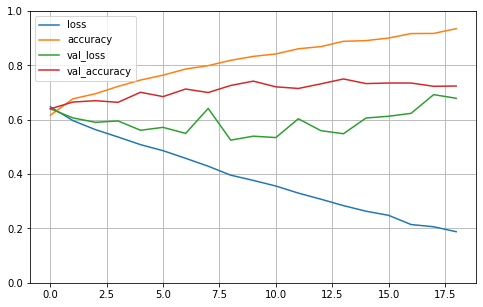

In [43]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

We observe that:
<ol>
<li>
    Val_loss reached an all time low around the ninth epoch and as expected training was early stopped at the nineteenth epoch so everything proceeded as expected.
</li>

<li>
    Model is gaining training accuracy after every epoch wheras the validation accuracy became nearly constant after about the eighth epoch so there is overfitting caused by reusing the available data multiple times. This could be solved by data augmentation.
</li>
</ol>

This is the end of the simple CNN model; to implement these changes a seperate file will be made.

## Clear Keras Backend and Proceed Further

In [44]:
keras.backend.clear_session()
del model